Importar numpy y pandas

In [0]:
# Análisis exploratorio
import numpy as np
import pandas as pd
import io
import math

# Helpers ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV  
from sklearn.preprocessing import StandardScaler

# ML Algoritmos
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Métricas
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Gráficos
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt


Subir xlsx

In [2]:
from google.colab import files
uploaded = files.upload()

Saving leaguesummer.xlsx to leaguesummer (1).xlsx


In [3]:
from google.colab import files
uploaded2 = files.upload()

Saving leaguespring.xlsx to leaguespring (1).xlsx


In [0]:
dfsummer = pd.read_excel(io.BytesIO(uploaded['leaguesummer.xlsx']))
dfspring = pd.read_excel(io.BytesIO(uploaded2['leaguespring.xlsx']))

Cantidad de reguistros del dataset

In [0]:
len(dfsummer)

12612

Mostrar todas las columnas en output de consola


In [0]:
pd.set_option('display.max_columns', None)

Lista de columnas

In [0]:
dfsummer.columns

Index(['gameid', 'url', 'league', 'split', 'date', 'week', 'game', 'patchno',
       'playerid', 'side', 'position', 'player', 'team', 'champion', 'ban1',
       'ban2', 'ban3', 'ban4', 'ban5', 'gamelength', 'result', 'k', 'd', 'a',
       'teamkills', 'teamdeaths', 'doubles', 'triples', 'quadras', 'pentas',
       'fb', 'fbassist', 'fbvictim', 'fbtime', 'kpm', 'okpm', 'ckpm', 'fd',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elementals',
       'oppelementals', 'firedrakes', 'waterdrakes', 'earthdrakes',
       'airdrakes', 'elders', 'oppelders', 'herald', 'heraldtime', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochamps', 'dmgtochampsperminute', 'dmgshare',
       'earnedgoldshare', 'wards', 'wpm', 'wardshare', 'wardkills', 'wcpm',
       'visionwards', 'visionwardbuys', 'visiblewardclearrate',
       'invisiblewardclearrate', 'totalgold', 'earnedg

Primeros registros del dataset

In [0]:
dfsummer.head(12)

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.1,1,Blue,Top,Licorice,Cloud9,Aatrox,Draven,Rakan,Rek'Sai,Ezreal,Sejuani,35.5,1,6,3,12,21,14,1,0,0,0,0,0.0,1,5.60912,0.169014,0.112676,0.985915,0,12.556633,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,15.162683,1.0,0,10,4,1.0,25.638017,1.0,0.0,19265.0,542.676056,0.273088,0.235685,22.0,0.619718,0.201835,4.0,0.112676,10.0,11.0,,,15443.0,304.850704,15000.0,0.100987,260.0,24.0,9.0,8.0,8.000000,3668.0,4205.0,-537.0,5476.0,6144.0,-668.0,4453.0,5258.0,-805.0,72.0,89.0,-17.0,127.0,152.0,-25.0
1,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.1,2,Blue,Jungle,Svenskeren,Cloud9,Hecarim,Draven,Rakan,Rek'Sai,Ezreal,Sejuani,35.5,1,1,5,10,21,14,0,0,0,0,0,0.0,0,5.60912,0.028169,0.000000,0.985915,0,12.556633,2,2,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,15.162683,1.0,0,10,4,1.0,25.638017,1.0,0.0,8693.0,244.873239,0.123226,0.176841,11.0,0.309859,0.100917,13.0,0.366197,8.0,10.0,,,12741.0,228.738028,12358.0,0.271900,33.0,167.0,110.0,0.0,5.633803,3341.0,3080.0,261.0,5113.0,4567.0,546.0,3876.0,3255.0,621.0,69.0,60.0,9.0,110.0,93.0,17.0
2,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.1,3,Blue,Middle,Nisqy,Cloud9,Sylas,Draven,Rakan,Rek'Sai,Ezreal,Sejuani,35.5,1,9,2,7,21,14,1,1,0,0,0,0.0,0,5.60912,0.253521,0.084507,0.985915,0,12.556633,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,15.162683,1.0,0,10,4,1.0,25.638017,1.0,0.0,18059.0,508.704225,0.255993,0.254719,10.0,0.281690,0.091743,3.0,0.084507,3.0,8.0,,,16317.0,329.470423,14875.0,0.111052,256.0,28.0,20.0,8.0,8.000000,3719.0,3193.0,526.0,5494.0,5092.0,402.0,4973.0,4549.0,424.0,83.0,86.0,-3.0,139.0,145.0,-6.0
3,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.1,4,Blue,ADC,Sneaky,Cloud9,Varus,Draven,Rakan,Rek'Sai,Ezreal,Sejuani,35.5,1,5,2,9,21,14,0,0,0,0,0,0.0,0,5.60912,0.140845,0.197183,0.985915,0,12.556633,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,15.162683,1.0,0,10,4,1.0,25.638017,1.0,0.0,17891.0,503.971831,0.253611,0.224666,12.0,0.338028,0.110092,17.0,0.478873,3.0,3.0,,,14937.0,290.597183,14225.0,0.014516,262.0,29.0,12.0,8.0,8.197183,3400.0,2924.0,476.0,5141.0,4735.0,406.0,3275.0,3002.0,273.0,95.0,67.0,28.0,148.0,122.0,26.0
4,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.1,5,Blue,Support,Zeyzal,Cloud9,Galio,Draven,Rakan,Rek'Sai,Ezreal,Sejuani,35.5,1,0,2,14,21,14,0,0,0,0,0,0.0,0,5.60912,0.000000,0.000000,0.985915,0,12.556633,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,15.162683,1.0,0,10,4,1.0,25.638017,1.0,0.0,6637.0,186.957746,0.0940818,0.108088,54.0,1.521127,0.495413,14.0,0.394366,18.0,18.0,,,9584.0,139.808451,8650.0,0.081203,70.0,0.0,0.0,0.0,1.971831,1990.0,2034.0,-44.0,3063.0,3078.0,-15.0,2683.0,2557.0,126.0,15.0,14.0,1.0,24.0,23.0,1.0
5,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.1,6,Red,Top,V1per,FlyQuest,Irelia,Sona,Yuumi,Jayce,Kai'Sa,Sivir,35.5,0,4,5,6,14,21,0,0,0,0,1,0.0,0,5.60912,0.112676,0.169014,0.985915,0,12.556633,2,2,0.0,0.

Métricas estadísticas del dataset


In [0]:
dfsummer.describe()

,patchno,playerid,gamelength,result,k,d,a,teamkills,teamdeaths,fbassist,kpm,okpm,ckpm,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
count,12612.000000,12612.000000,12612.000000,12612.00000,12612.000000,12612.000000,12612.000000,12612.000000,12612.000000,8676.000000,12612.000000,12612.000000,12612.000000,8676.000000,12612.000000,12612.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,1446.000000,8676.000000,8676.000000,8676.000000,12612.000000,12612.000000,8088.000000,8088.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,9332.000000,8676.000000,8676.000000,8.676000e+03,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000,8676.000000
mean,9.131275,28.413019,32.781335,0.50000,4.063273,4.072788,9.239454,12.189819,12.218363,0.202282,0.126194,0.126194,0.757165,9.444341,2.125119,2.125119,0.685569,0.685569,0.178423,0.163209,0.168511,0.175426,0.029276,0.029276,0.500000,12.733062,0.500000,14.394491,0.499308,5.925309,5.925309,0.500000,26.049961,0.688797,0.688797,19509.834025,582.523073,40.719917,1.215313,0.333333,17.886353,0.528752,14.276856,15.461272,22491.616481,379.085930,18404.266943,5.758418e-20,298.314431,64.809129,42.854311,5.584140,10.953075,5190.285154,5190.285154,0.000000,8190.468419,8190.468419,0.000000,6191.726141,6191.726141,0.000000,106.278700,106.278700,0.000000,167.822729,167.822729,0.000000
std,0.017830,58.154672,5.726986,0.50002,5.011520,4.801831,11.176842,6.567169,6.570194,0.401725,0.159911,0.159911,0.274742,2.712491,1.490609,1.490609,1.166202,1.166202,0.487516,0.472030,0.467212,0.487894,0.181751,0.181751,0.500029,2.092125,0.500029,2.116729,0.500028,3.829608,3.829608,0.500031,3.775442,0.759474,0.759474,20527.677038,583.261872,42.045239,1.192326,0.318120,19.103697,0.531363,14.469345,15.494247,20673.460084,355.820998,17339.253895,1.868849e-01,297.461834,76.043390,50.263770,9.274275,10.281643,4683.944866,4683.944866,691.317754,7412.065409,7412.065409,1384.400831,5597.988428,5597.988428,540.078745,99.446217,99.446217,18.396604,156.917597,156.917597,26.361171
min,9.100000,1.000000,19.066667,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.161377,5.243533,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.331233,0.000000,7.992817,0.000000,0.000000,0.000000,0.000000,20.236067,0.000000,0.000000,473.000000,18.440546,3.000000,0.090316,0.032468,0.000000,0.000000,0.000000,0.000000,3933.000000,37.464507,3550.000000,-6.819222e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1686.000000,1686.000000,-6159.000000,2510.000000,2510.000000,-12230.000000,1524.000000,1524.000000,-3365.000000,0.000000,0.000000,-83.000000,0.000000,0.000000,-163.000000
25%,9.110000,1.000000,28.466667,0.00000,1.000000,1.000000,3.000000,7.000000,7.000000,0.000000,0.028947,0.028947,0.567057,7.364117,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.107092,0.000000,12.852267,0.000000,2.000000,2.000000,0.000000,23.102767,0.000000,0.000000,6750.000000,213.454440,14.000000,0.434496,0.121739,6.000000,0.198230,5.000000,6.000000,9978.000000,178.865176,9025.000000,-1.247702e-01,54.000000,8.0000

Cantidad de partidos total

In [0]:
len(dfsummer.groupby(by= 'gameid'))

1046

Cantidad de partidos jugados por liga

In [0]:
groupByLeague = dfsummer.groupby('league')
groupByLeague.gameid.nunique()

league
CBLoL     96
LCK      244
LCS      131
LEC      125
LMS      125
LPL      328
Name: gameid, dtype: int64

Cantidad de equipos por liga

In [0]:
groupByLeague.team.nunique()


league
CBLoL     8
LCK      10
LCS      10
LEC      10
LMS       7
LPL      16
Name: team, dtype: int64

Equipos por liga

In [0]:
groupByLeague.team.unique()

league
CBLoL    [KaBuM, Team One, INTZ, Flamengo, paiN Gaming,...
LCK      [Jin Air Green Wings, KT Rolster, Gen.G, Damwo...
LCS      [Cloud9, FlyQuest, Team Liquid, Team SoloMid, ...
LEC      [G2 Esports, Splyce, Origen, Vitality, Rogue, ...
LMS      [Hong Kong Attitude, MAD Team, Flash Wolves, A...
LPL      [Dominus Esports, Edward Gaming, JD Gaming, Fu...
Name: team, dtype: object

Removemos la liga LPL ya que no tiene datos importantes para la predicción

In [5]:
# Excluimos LPL
dfsummer = dfsummer[dfsummer.league != 'LPL']
dfspring = dfspring[(dfspring.league != 'LPL') & (dfspring.league != 'MSI')]
dfsummer

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.10,1,Blue,Top,Licorice,Cloud9,Aatrox,Draven,Rakan,Rek'Sai,Ezreal,Sejuani,35.500000,1,6,3,12,21,14,1,0,0,0,0,0.0,1,5.60912,0.169014,0.112676,0.985915,0,12.556633,2,...,25.638017,1.0,0.0,19265.0,542.676056,0.273088,0.235685,22.0,0.619718,0.201835,4.0,0.112676,10.0,11.0,,,15443.0,304.850704,15000.0,0.100987,260.0,24.0,9.0,8.0,8.000000,3668.0,4205.0,-537.0,5476.0,6144.0,-668.0,4453.0,5258.0,-805.0,72.0,89.0,-17.0,127.0,152.0,-25.0
1,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.10,2,Blue,Jungle,Svenskeren,Cloud9,Hecarim,Draven,Rakan,Rek'Sai,Ezreal,Sejuani,35.500000,1,1,5,10,21,14,0,0,0,0,0,0.0,0,5.60912,0.028169,0.000000,0.985915,0,12.556633,2,...,25.638017,1.0,0.0,8693.0,244.873239,0.123226,0.176841,11.0,0.309859,0.100917,13.0,0.366197,8.0,10.0,,,12741.0,228.738028,12358.0,0.271900,33.0,167.0,110.0,0.0,5.633803,3341.0,3080.0,261.0,5113.0,4567.0,546.0,3876.0,3255.0,621.0,69.0,60.0,9.0,110.0,93.0,17.0
2,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.10,3,Blue,Middle,Nisqy,Cloud9,Sylas,Draven,Rakan,Rek'Sai,Ezreal,Sejuani,35.500000,1,9,2,7,21,14,1,1,0,0,0,0.0,0,5.60912,0.253521,0.084507,0.985915,0,12.556633,2,...,25.638017,1.0,0.0,18059.0,508.704225,0.255993,0.254719,10.0,0.281690,0.091743,3.0,0.084507,3.0,8.0,,,16317.0,329.470423,14875.0,0.111052,256.0,28.0,20.0,8.0,8.000000,3719.0,3193.0,526.0,5494.0,5092.0,402.0,4973.0,4549.0,424.0,83.0,86.0,-3.0,139.0,145.0,-6.0
3,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.10,4,Blue,ADC,Sneaky,Cloud9,Varus,Draven,Rakan,Rek'Sai,Ezreal,Sejuani,35.500000,1,5,2,9,21,14,0,0,0,0,0,0.0,0,5.60912,0.140845,0.197183,0.985915,0,12.556633,2,...,25.638017,1.0,0.0,17891.0,503.971831,0.253611,0.224666,12.0,0.338028,0.110092,17.0,0.478873,3.0,3.0,,,14937.0,290.597183,14225.0,0.014516,262.0,29.0,12.0,8.0,8.197183,3400.0,2924.0,476.0,5141.0,4735.0,406.0,3275.0,3002.0,273.0,95.0,67.0,28.0,148.0,122.0,26.0
4,1092338,http://matchhistory.na.leagueoflegends.com/en/...,LCS,2019-2,43617.6,1,1,9.10,5,Blue,Support,Zeyzal,Cloud9,Galio,Draven,Rakan,Rek'Sai,Ezreal,Sejuani,35.500000,1,0,2,14,21,14,0,0,0,0,0,0.0,0,5.60912,0.000000,0.000000,0.985915,0,12.556633,2,...,25.638017,1.0,0.0,6637.0,186.957746,0.0940818,0.108088,54.0,1.521127,0.495413,14.0,0.394366,18.0,18.0,,,9584.0,139.808451,8650.0,0.081203,70.0,0.0,0.0,0.0,1.971831,1990.0,2034.0,-44.0,3063.0,3078.0,-15.0,2683.0,2557.0,126.0,15.0,14.0,1.0,24.0,23.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12607,1041163,https://matchhistory.na.leagueoflegends.com/en...,LEC,2019-2RQ,43723.5,R3,3,9.16,8,Red,Middle,Humanoid,Splyce,Yasuo,Yuumi,Akali,Aatrox,Nocturne,Urgot,24.816667,0,1,4,4,9,17,0,0,0,0,0,0.0,0,5.0632,0.040296,0.201478,1.047683,0,17.203517,0,...,20.600317,0.0,1.0,6745.0,271.793150,0.173795,0.248564,9.0,0.362660,0.140625,1.0,0.040296,2.0,3.0,,,10055.0,271.665816,9875.0,-0.141876,246.0,12.0,5.0,1.0,10

Vamos a trabajar con los partids relativos a la liga, por tanto eliminamos aquellos que corresponden a los playofs

In [0]:
# Removemos registros de partidos con el campo week con letras
dfPlayoffGamesRemoved =  dfsummer[dfsummer['week'].str.contains('[A-Za-z]', na=False)] 
dfsummer = dfsummer[~dfsummer['week'].isin(dfPlayoffGamesRemoved.week)]

# Misma accion spring dataset
dfPlayoffGamesRemoved =  dfspring[dfspring['week'].str.contains('[A-Za-z]', na=False)] 
dfspring = dfspring[~dfspring['week'].isin(dfPlayoffGamesRemoved.week)]
##

Convertir Semana en int para luego poder ordenar correctamente

In [7]:
pd.to_numeric(dfsummer['week'],errors='coerce')

# Misma accion spring dataset
pd.to_numeric(dfspring['week'],errors='coerce')
##


0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10387    9.4
10388    9.4
10389    9.4
10390    9.4
10391    9.4
Name: week, Length: 7284, dtype: float64

Obtener gameid a duplicados

In [8]:
# DUPLICADO
Dupes = dfsummer.groupby('gameid').size()
Dupes = Dupes.where(lambda x : x > 12).dropna()


# Se puede apreciar que son 40 en vez de 20
#dfsummer[(dfsummer.gameid == 1092517) | (dfsummer.gameid == 1092552)]



# Misma accion spring dataset (No dupes)
Dupes2 = dfspring.groupby('gameid').size()
Dupes2 = Dupes.where(lambda x : x > 12).dropna()

##


Dupes

gameid
1092517    24.0
1092552    24.0
dtype: float64

Agrego ids inexistentes a 2 de los duplicados

In [10]:
dfsummer.loc[(dfsummer.gameid == 1092517) & (dfsummer.week == 1), ['gameid']] = 1092567
dfsummer.loc[(dfsummer.gameid == 1092552) & (dfsummer.week == 1), ['gameid']] = 1092553

dfsummer[(dfsummer.gameid == 1092567) | (dfsummer.gameid == 1092553)]

#c9 vs cg = 1092567
#cg vs tl = 1092553


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
84,1092553,https://matchhistory.na.leagueoflegends.com/en...,LCS,2019-2,43618.6,1,2,9.1,1,Blue,Top,Solo,Echo Fox,Gangplank,Ryze,Irelia,Aatrox,Rumble,Olaf,28.6,1,6,1,3,11,8,1,1,0,0,0,0.0,0,4.2982,0.209790,0.034965,0.664336,0,11.021517,1,...,NaN,0.0,0.0,21805.0,762.412587,0.472594,0.284428,12.0,0.419580,0.129032,8.0,0.279720,3.0,3.0,,,13513.0,340.446154,11658.0,0.245378,258.0,17.0,2.0,8.0,9.615385,2954.0,3337.0,-383.0,4991.0,5100.0,-109.0,4124.0,4127.0,-3.0,67.0,73.0,-6.0,128.0,120.0,8.0
85,1092553,https://matchhistory.na.leagueoflegends.com/en...,LCS,2019-2,43618.6,1,2,9.1,2,Blue,Jungle,Rush,Echo Fox,Skarner,Ryze,Irelia,Aatrox,Rumble,Olaf,28.6,1,1,2,8,11,8,0,0,0,0,0,0.0,0,4.2982,0.034965,0.209790,0.664336,0,11.021517,1,...,NaN,0.0,0.0,4368.0,152.727273,0.0946705,0.17354,21.0,0.734266,0.225806,7.0,0.244755,5.0,5.0,,,9717.0,207.718881,8575.0,-0.204188,16.0,130.0,99.0,4.0,5.104895,3361.0,3643.0,-282.0,5138.0,5688.0,-550.0,3269.0,3445.0,-176.0,54.0,61.0,-7.0,81.0,93.0,-12.0
86,1092553,https://matchhistory.na.leagueoflegends.com/en...,LCS,2019-2,43618.6,1,2,9.1,3,Blue,Middle,Yusui,Echo Fox,Sylas,Ryze,Irelia,Aatrox,Rumble,Olaf,28.6,1,1,2,3,11,8,0,0,0,0,0,0.0,0,4.2982,0.034965,0.034965,0.664336,0,11.021517,1,...,NaN,0.0,0.0,10498.0,367.062937,0.22753,0.219198,10.0,0.349650,0.107527,10.0,0.349650,5.0,6.0,,,11280.0,262.369231,10250.0,0.027194,220.0,20.0,20.0,0.0,8.391608,2972.0,3419.0,-447.0,5374.0,5796.0,-422.0,4276.0,4902.0,-626.0,72.0,96.0,-24.0,121.0,154.0,-33.0
87,1092553,https://matchhistory.na.leagueoflegends.com/en...,LCS,2019-2,43618.6,1,2,9.1,4,Blue,ADC,Lost,Echo Fox,Kai'Sa,Ryze,Irelia,Aatrox,Rumble,Olaf,28.6,1,3,1,4,11,8,1,0,0,0,0,0.0,0,4.2982,0.104895,0.000000,0.664336,0,11.021517,1,...,NaN,0.0,0.0,6579.0,230.034965,0.142591,0.230298,11.0,0.384615,0.118280,15.0,0.524476,4.0,4.0,,,11660.0,275.655944,9250.0,-0.296893,249.0,12.0,8.0,4.0,9.125874,2999.0,3666.0,-667.0,4423.0,6088.0,-1665.0,3043.0,3448.0,-405.0,70.0,93.0,-23.0,104.0,152.0,-48.0
88,1092553,https://matchhistory.na.leagueoflegends.com/en...,LCS,2019-2,43618.6,1,2,9.1,5,Blue,Support,Hakuho,Echo Fox,Galio,Ryze,Irelia,Aatrox,Rumble,Olaf,28.6,1,0,2,6,11,8,0,0,0,0,0,0.0,1,4.2982,0.000000,0.000000,0.664336,0,11.021517,1,...,NaN,0.0,0.0,2889.0,101.013986,0.0626151,0.0925358,39.0,1.363636,0.419355,12.0,0.419580,10.0,12.0,,,6944.0,110.760839,6600.0,-0.029851,73.0,0.0,0.0,0.0,2.552448,2045.0,2350.0,-305.0,2979.0,4024.0,-1045.0,2701.0,2767.0,-66.0,16.0,0.0,16.0,28.0,1.0,27.0
89,1092553,https://matchhistory.na.leagueoflegends.com/en...,LCS,2019-2,43618.6,1,2,9.1,6,Red,Top,Impact,Team Liquid,Vladimir,Yuumi,Jayce,Taric,Jarvan IV,Camille,28.6,0,1,3,4,8,11,0,0,0,0,0,0.0,0,4.2982,0.034965,0.209790,0.664336,0,11.021517,3,...,NaN,0.0,0.0,13362.0,467.202797,0.308449,0.172427,16.0,0.559441,0.160000,3.0,0.104895,7.0,9.0,,,9183.0,189.047552,9110.0,-0.245378,207.0,0.0,0.0,0.0,7.237762,3337.0,2954.0,383.0,5100.0,4991.0,109.0,4127.0,4124.0,3.0,73.0,67.0,6.0,120.0,128.0,-8.0
90,1092553,https://matchhistory.na.leagueoflegends.com/en...,LCS,2019-2,43618.6,1,2,9.1,7,Red,Jungle,Xmithie,Team Liquid,Rek'Sai,Yuumi,Jayce,Taric,Jarvan IV,Camille,28.6,0,6,3,2,8,11,1,0,0,0,1,0.0,0,4.2982,0.209790,0.034965,0.664336,1,11.021517,3,...,NaN,0.0,0.0,6185.0,216.258741,0.142775,0.218541,27.0,0.944056,0.270000,14.0,0.

Obtener registros de partidos ordenados x liga y semana

In [11]:
# Diapositiva *)

def processRow(dataf):
     mascara = dataf.loc[(dataf.playerid == 100) | (dataf.playerid == 200)]
     return mascara
     

dfMatches = dfsummer.groupby(['league','week','game','team']).apply(processRow).reset_index(drop=True)

# Misma accion spring dataset
dfMatchesSpring = dfspring.groupby(['league','week','game','team']).apply(processRow).reset_index(drop=True)
##

dfMatches.head()


,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1102260,http://matchhistory.na.leagueoflegends.com/en/...,CBLoL,2019-2,43617.5,1,1,9.1,200,Red,Team,Team,CNB,,Karthus,Jayce,Aatrox,Renekton,Gangplank,24.116667,0,4,13,8,4,13,,,,,1,1.0,0,0.97345,0.165860,0.539046,0.704907,1,9.289900,2,...,20.968617,0.0,1.0,27797.0,1152.605390,,,75.0,3.109883,1.0,23.0,0.953697,27.0,33.0,0.535714,0.176471,36757.0,854.993780,36213.0,-0.106460,633.0,135.0,105.0,3.0,31.845197,15130.0,16057.0,-927.0,23819.0,25629.0,-1810.0,18349.0,19777.0,-1428.0,332.0,333.0,-1.0,513.0,517.0,-4.0
1,1102245,http://matchhistory.na.leagueoflegends.com/en/...,CBLoL,2019-2,43617.5,1,1,9.1,100,Blue,Team,Team,Flamengo,,Morgana,Nautilus,Sylas,Vladimir,Jayce,28.400000,1,13,5,30,13,5,,,,,1,0.0,0,5.41095,0.457746,0.176056,0.633803,1,11.792667,3,...,20.676417,2.0,0.0,46692.0,1644.084507,,,87.0,3.063380,1.0,27.0,0.950704,24.0,30.0,0.53125,0.2,55713.0,1301.204225,52483.0,0.228980,740.0,206.0,111.0,30.0,33.309859,15104.0,14374.0,730.0,25208.0,22632.0,2576.0,18506.0,18070.0,436.0,330.0,286.0,44.0,506.0,457.0,49.0
2,1102281,https://matchhistory.na.leagueoflegends.com/en...,CBLoL,2019-2,43617.5,1,1,9.1,100,Blue,Team,Team,INTZ,,Yasuo,Neeko,Irelia,Rumble,Hecarim,31.066667,0,4,17,8,4,17,,,,,0,0.0,1,12.2282,0.128755,0.547210,0.675966,0,8.562733,0,...,23.675700,0.0,2.0,41972.0,1351.030043,,,85.0,2.736052,1.0,26.0,0.836910,31.0,36.0,0.418605,0.210526,47294.0,865.982833,45550.0,-0.087641,788.0,158.0,108.0,12.0,30.450644,14068.0,14589.0,-521.0,22812.0,25555.0,-2743.0,17772.0,17899.0,-127.0,298.0,308.0,-10.0,477.0,484.0,-7.0
3,1102289,http://matchhistory.na.leagueoflegends.com/en/...,CBLoL,2019-2,43617.6,1,1,9.1,200,Red,Team,Team,KaBuM,,Ryze,Morgana,Aatrox,Neeko,LeBlanc,34.983333,1,20,9,42,20,9,,,,,1,1.0,0,4.70255,0.571701,0.257265,0.828966,1,9.069333,4,...,23.909717,2.0,0.0,60455.0,1728.108623,,,142.0,4.059076,1.0,73.0,2.086708,47.0,48.0,0.709091,0.4,70386.0,1360.596475,64625.0,0.180790,994.0,213.0,97.0,43.0,34.502144,16568.0,15000.0,1568.0,27823.0,22610.0,5213.0,19413.0,18248.0,1165.0,337.0,322.0,15.0,510.0,494.0,16.0
4,1102281,https://matchhistory.na.leagueoflegends.com/en...,CBLoL,2019-2,43617.5,1,1,9.1,200,Red,Team,Team,Redemption,,LeBlanc,Aatrox,Ryze,Jayce,Ahri,31.066667,1,17,4,42,17,4,,,,,1,1.0,0,12.2282,0.547210,0.128755,0.675966,1,8.562733,4,...,23.675700,2.0,0.0,63889.0,2056.512876,,,81.0,2.607296,1.0,29.0,0.933476,37.0,37.0,0.4375,0.283019,59230.0,1250.188841,49725.0,0.087641,734.0,190.0,107.0,25.0,29.742489,14589.0,14068.0,521.0,25555.0,22812.0,2743.0,17899.0,17772.0,127.0,308.0,298.0,10.0,484.0,477.0,7.0


Dataframe de resultados de jugadores 

In [12]:
# Diapositiva **)

def processRow(dataf):
     mascara = dataf.loc[(dataf.playerid != 100) & (dataf.playerid != 200)]
     return mascara
     

dfPlayerMatches = dfsummer.groupby(['league','week','game','team']).apply(processRow).reset_index(drop=True)



# Misma accion spring dataset
dfPlayerMatchesSpring = dfspring.groupby(['league','week','game','team']).apply(processRow).reset_index(drop=True)
#

dfPlayerMatches[dfPlayerMatches.position == 'Top']

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1102260,http://matchhistory.na.leagueoflegends.com/en/...,CBLoL,2019-2,43617.5,1,1,9.10,6,Red,Top,Duclou,CNB,Akali,Karthus,Jayce,Aatrox,Renekton,Gangplank,24.116667,0,1,4,2,4,13,0,0,0,0,0,1.0,0,0.97345,0.041465,0.082930,0.704907,0,9.289900,2,...,20.968617,0.0,1.0,6047.0,250.739461,0.217541,0.217925,11.0,0.456116,0.146667,2.0,0.082930,4.0,6.0,,,7721.0,186.324257,7750.0,-0.154762,181.0,0.0,0.0,0.0,7.505183,3123.0,3640.0,-517.0,5424.0,5310.0,114.0,4177.0,4734.0,-557.0,80.0,82.0,-2.0,127.0,129.0,-2.0
5,1102245,http://matchhistory.na.leagueoflegends.com/en/...,CBLoL,2019-2,43617.5,1,1,9.10,1,Blue,Top,Robo,Flamengo,Akali,Morgana,Nautilus,Sylas,Vladimir,Jayce,28.400000,1,4,0,1,13,5,1,0,0,0,0,0.0,0,5.41095,0.140845,0.000000,0.633803,0,11.792667,3,...,20.676417,2.0,0.0,14856.0,523.098592,0.31817,0.234675,14.0,0.492958,0.160920,4.0,0.140845,5.0,5.0,,,12424.0,305.360563,11425.0,0.296482,245.0,9.0,1.0,5.0,8.943662,3477.0,3166.0,311.0,5437.0,5043.0,394.0,4883.0,4376.0,507.0,94.0,83.0,11.0,147.0,133.0,14.0
10,1102281,https://matchhistory.na.leagueoflegends.com/en...,CBLoL,2019-2,43617.5,1,1,9.10,1,Blue,Top,Tay,INTZ,Gnar,Yasuo,Neeko,Irelia,Rumble,Hecarim,31.066667,0,3,3,1,4,17,0,0,0,0,0,0.0,0,12.2282,0.096567,0.032189,0.675966,0,8.562733,0,...,23.675700,0.0,2.0,13213.0,425.311159,0.314805,0.299624,11.0,0.354077,0.129412,5.0,0.160944,2.0,2.0,,,12139.0,259.469099,11350.0,0.292929,230.0,10.0,4.0,4.0,7.725322,2985.0,3055.0,-70.0,5343.0,4370.0,973.0,4428.0,4265.0,163.0,73.0,79.0,-6.0,116.0,112.0,4.0
15,1102289,http://matchhistory.na.leagueoflegends.com/en/...,CBLoL,2019-2,43617.6,1,1,9.10,6,Red,Top,Wizer,KaBuM,Pyke,Ryze,Morgana,Aatrox,Neeko,LeBlanc,34.983333,1,5,2,5,20,9,0,0,0,0,0,0.0,0,4.70255,0.142925,0.028585,0.828966,0,9.069333,4,...,23.909717,2.0,0.0,13233.0,378.265841,0.21889,0.209534,14.0,0.400191,0.098592,12.0,0.343020,7.0,7.0,,,14531.0,285.091186,14100.0,0.167147,260.0,8.0,0.0,0.0,7.660791,3175.0,3138.0,37.0,5292.0,4727.0,565.0,4311.0,4131.0,180.0,68.0,70.0,-2.0,103.0,113.0,-10.0
20,1102281,https://matchhistory.na.leagueoflegends.com/en...,CBLoL,2019-2,43617.5,1,1,9.10,6,Red,Top,Nyu,Redemption,Renekton,LeBlanc,Aatrox,Ryze,Jayce,Ahri,31.066667,1,1,2,5,17,4,0,0,0,0,0,0.0,0,12.2282,0.032189,0.096567,0.675966,0,8.562733,4,...,23.675700,2.0,0.0,9665.0,311.105150,0.151278,0.178707,14.0,0.450644,0.172840,4.0,0.128755,4.0,4.0,,,11019.0,223.417597,8450.0,-0.292929,218.0,10.0,1.0,4.0,7.339056,3055.0,2985.0,70.0,4370.0,5343.0,-973.0,4265.0,4428.0,-163.0,79.0,73.0,6.0,112.0,116.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,1156346,http://matchhistory.na.leagueoflegends.com/en/...,LMS,2019-2,43681.3,7.3,2,9.14,1,Blue,Top,Rock,MAD Team,Neeko,Rumble,Yasuo,Aatrox,Renekton,Gnar,28.183333,1,3,4,16,22,12,0,0,0,0,0,0.0,0,3.06793,0.106446,0.141928,1.206387,0,6.818517,3,...,22.930150,1.0,0.0,14423.0,511.756357,0.206293,0.17648,9.0,0.319338,0.101124,3.0,0.106446,1.0,2.0,,,10579.0,243.184861,9750.0,-0.050487,175.0,7.0,7.0,0.0,6.457717,3400.0,3583.0,-183.0,4864.0,6290.0,-1426.

Dataset con Kill / Deaths / Asissts acumuladas por equipo/semana/posicion/

In [13]:
# Diapositiva **)

# Esto se realiza con el motivo de tener las métricas básicas de los jugadores acumuladas a la hora de predecir

dfPlayerMatches[['k_cumulative','d_cumulative','a_cumulative']] = dfPlayerMatches.groupby(['league','team','position'])[['k','d','a']].cumsum()

# Misma accion spring dataset
dfPlayerMatchesSpring[['k_cumulative','d_cumulative','a_cumulative']] = dfPlayerMatchesSpring.groupby(['league','team','position'])[['k','d','a']].cumsum()
#

dfPlayerMatches.loc[dfPlayerMatches.team == 'CNB',['league','week','game','team','position', 'k','d','a','k_cumulative','d_cumulative','a_cumulative']].head(50)

,league,week,game,team,position,k,d,a,k_cumulative,d_cumulative,a_cumulative
0,CBLoL,1,1,CNB,Top,1,4,2,1,4,2
1,CBLoL,1,1,CNB,Jungle,0,3,2,0,3,2
2,CBLoL,1,1,CNB,Middle,1,2,1,1,2,1
3,CBLoL,1,1,CNB,ADC,0,1,2,0,1,2
4,CBLoL,1,1,CNB,Support,2,3,1,2,3,1
40,CBLoL,1,2,CNB,Top,5,3,5,6,7,7
41,CBLoL,1,2,CNB,Jungle,0,5,11,0,8,13
42,CBLoL,1,2,CNB,Middle,3,2,7,4,4,8
43,CBLoL,1,2,CNB,ADC,9,3,4,9,4,6
44,CBLoL,1,2,CNB,Support,0,7,8,2,10,9


Calcular métrica kda 

In [0]:
# Diapositiva **)

def getKDA(k,d,a):
  divisor = d if d != 0 else 1
  return (k + a ) / divisor


dfPlayerMatches['kda'] = dfPlayerMatches.apply(lambda x: getKDA(x['k_cumulative'],x['d_cumulative'],x['a_cumulative']), axis = 1)
dfPlayerMatches.loc[:,['league','week','game','team','position', 'k','d','a','k_cumulative','d_cumulative','a_cumulative','kda']].head(50)

# Misma accion spring dataset
dfPlayerMatchesSpring['kda'] = dfPlayerMatchesSpring.apply(lambda x: getKDA(x['k_cumulative'],x['d_cumulative'],x['a_cumulative']), axis = 1)
#

# dfPlayerMatches.loc[:,['league','week','game','team','position', 'k','d','a','k_cumulative','d_cumulative','a_cumulative','kda']].head(50)
# dfPlayerMatches.apply(lambda x: print(x['k_cumulative'] + x['a_cumulative'])) 
# dfPlayerMatches['kda']  = (dfPlayerMatches.k_cumulative + dfPlayerMatches.a_cumulative) / dfPlayerMatches.d_cumulative
# dfPlayerMatches.k_cumulative + dfPlayerMatches.a_cumulative / dfPlayerMatches.d_cumulative
# dfPlayerMatches['kda']  = dfPlayerMatches.k_cumulative + dfPlayerMatches.a_cumulative / dfPlayerMatches.d_cumulative if dfPlayerMatches.d_cumulative != 0  else 1
# dfPlayerMatches

Calcular métricas con promedio acumulado

In [15]:
# Diapositiva *)

# Convertimos type (0) to int
dfMatches['fb'] = pd.to_numeric(dfMatches['fb'],errors='coerce')
dfMatches['fd'] = pd.to_numeric(dfMatches['fd'],errors='coerce')
dfMatchesSpring['fb'] = pd.to_numeric(dfMatchesSpring['fb'],errors='coerce')
dfMatchesSpring['fd'] = pd.to_numeric(dfMatchesSpring['fd'],errors='coerce')


# Agrupamos por liga y equipo y hacemos un promedio acumulado, 
# Reseteamos todos los indices y luego seteamos el nivel 2 que es el indice del group by para poder conservarlo 
dfMatches2 = dfMatches.groupby(['league','team'])[['earnedgpm','wards','fb','fd','teamdragkills','cspm','dmgtochampsperminute','teamtowerkills']].expanding().mean().reset_index().set_index('level_2')

# Asignamos las métricas obtenidas en el dataset temporal y lo volcamos dfMatches
dfMatches = dfMatches.assign(earnedgpm_avgcumulative = dfMatches2.earnedgpm , 
                             wards_avgcumulative = dfMatches2.wards,
                             fb_avgcumulative = dfMatches2.fb,
                             fd_avgcumulative = dfMatches2.fd,
                             teamdragkills_avgcumulative = dfMatches2.teamdragkills,
                             cspm_avgcumulative = dfMatches2.cspm,
                             dmgtochampsperminute_avgcumulative = dfMatches2.dmgtochampsperminute,
                             teamtowerkills_avgcumulative = dfMatches2.teamtowerkills) 


# Misma accion spring dataset
dfMatches3 = dfMatchesSpring.groupby(['league','team'])[['earnedgpm','wards','fb','fd','teamdragkills','cspm','dmgtochampsperminute','teamtowerkills']].expanding().mean().reset_index().set_index('level_2')
dfMatchesSpring = dfMatchesSpring.assign(earnedgpm_avgcumulative = dfMatches3.earnedgpm, 
                                                     wards_avgcumulative = dfMatches3.wards,
                                                     fb_avgcumulative = dfMatches3.fb,
                                                     fd_avgcumulative = dfMatches3.fd,
                                                     teamdragkills_avgcumulative = dfMatches3.teamdragkills,
                                                     cspm_avgcumulative = dfMatches3.cspm,
                                                     dmgtochampsperminute_avgcumulative = dfMatches3.dmgtochampsperminute,
                                                     teamtowerkills_avgcumulative = dfMatches3.teamtowerkills)                                          


dfMatches.loc[dfMatches.team == 'CNB',['team','wards','earnedgpm','earnedgpm_avgcumulative','wards_avgcumulative','fb_avgcumulative','fd_avgcumulative','teamdragkills_avgcumulative','cspm_avgcumulative','dmgtochampsperminute_avgcumulative','teamtowerkills_avgcumulative']].head()

,team,wards,earnedgpm,earnedgpm_avgcumulative,wards_avgcumulative,fb_avgcumulative,fd_avgcumulative,teamdragkills_avgcumulative,cspm_avgcumulative,dmgtochampsperminute_avgcumulative,teamtowerkills_avgcumulative
0,CNB,75.0,854.993780,854.993780,75.000000,1.0,1.0,2.000000,31.845197,1152.605390,1.00
8,CNB,239.0,1141.450292,998.222036,157.000000,1.0,1.0,3.500000,31.907004,1485.025892,5.00
16,CNB,119.0,1068.675422,1021.706498,144.333333,1.0,1.0,3.333333,31.787283,1404.248031,5.00
24,CNB,149.0,1036.319139,1025.359659,145.500000,1.0,1.0,3.500000,31.424506,1396.229501,4.25
32,CNB,149.0,1243.280899,1068.943907,146.200000,0.8,0.8,3.200000,31.585585,1433.064846,5.40


Unir registros equipos por gameId

In [17]:
# Diapositiva ***)

# Retornamos series con data combinados de diferentes filas para un mismo gameid
def getMatchesAccumulated(x,field):
  return pd.Series({ 'Week' : x["week"].iloc[0],
                    'Game' : x["game"].iloc[0],
                    'League' : x["league"].iloc[0],
                    'RedTeam' : x["team"].iloc[0], 
                    'Redearnedgpmcmv' : x["earnedgpm_avgcumulative"].iloc[0], 
                    'Redwardscmv' : x["wards_avgcumulative"].iloc[0],       
                    'Red_fb_avgcumulative' : x["fb_avgcumulative"].iloc[0],       
                    'Red_fd_avgcumulative' : x["fd_avgcumulative"].iloc[0],
                    'Red_teamdragkills_avgcumulative' : x["teamdragkills_avgcumulative"].iloc[0],
                    'Red_cspm_avgcumulative' : x["cspm_avgcumulative"].iloc[0],       
                    'Red_dmgtochampsperminute_avgcumulative' : x["dmgtochampsperminute_avgcumulative"].iloc[0],
                    'Red_teamtowerkills_avgcumulative' : x["teamtowerkills_avgcumulative"].iloc[0],                    
                    'BlueTeam': x["team"].iloc[1], 
                    'Blueearnedgpmcmv': x["earnedgpm_avgcumulative"].iloc[1],
                    'Bluewardscmv': x["wards_avgcumulative"].iloc[1],
                    'Blue_fb_avgcumulative' : x["fb_avgcumulative"].iloc[1],       
                    'Blue_fd_avgcumulative' : x["fd_avgcumulative"].iloc[1],
                    'Blue_teamdragkills_avgcumulative' : x["teamdragkills_avgcumulative"].iloc[1],
                    'Blue_cspm_avgcumulative' : x["cspm_avgcumulative"].iloc[1],       
                    'Blue_dmgtochampsperminute_avgcumulative' : x["dmgtochampsperminute_avgcumulative"].iloc[1],
                    'Blue_teamtowerkills_avgcumulative' : x["teamtowerkills_avgcumulative"].iloc[1],                     
                    'RedWin': 1 if x["result"].iloc[0] == 1 else 0})


# Cambios
dfMatches.sort_values(by=['side'],inplace=True,ascending=[False])

dfMatchesCombined = dfMatches.groupby('gameid').apply(getMatchesAccumulated, field = 'team').reset_index()

# Ordenamos por liga/semana/juego
dfMatchesCombinedSorted = dfMatchesCombined.sort_values(by=['League','Week','Game'])
print(dfMatchesCombinedSorted.to_string())


# Misma accion spring dataset
dfMatchesSpring.sort_values(by=['side'],inplace=True,ascending=[False])
dfMatchesSpringCombined = dfMatchesSpring.groupby('gameid').apply(getMatchesAccumulated, field = 'team').reset_index()
dfMatchesSpringCombinedSorted = dfMatchesSpringCombined.sort_values(by=['League','Week','Game'])
#

#dfMatches[dfMatches.gameid == 1102281]



      gameid  Week  Game League               RedTeam  Redearnedgpmcmv  Redwardscmv  Red_fb_avgcumulative  Red_fd_avgcumulative  Red_teamdragkills_avgcumulative  Red_cspm_avgcumulative  Red_dmgtochampsperminute_avgcumulative  Red_teamtowerkills_avgcumulative              BlueTeam  Blueearnedgpmcmv  Bluewardscmv  Blue_fb_avgcumulative  Blue_fd_avgcumulative  Blue_teamdragkills_avgcumulative  Blue_cspm_avgcumulative  Blue_dmgtochampsperminute_avgcumulative  Blue_teamtowerkills_avgcumulative  RedWin
195  1102245   1.0     1  CBLoL           paiN Gaming       878.880282    81.000000              0.000000              0.000000                         0.000000               29.401408                             1769.366197                          0.000000              Flamengo       1301.204225     87.000000               1.000000               1.000000                          3.000000                33.309859                              1644.084507                          11.000000     

Unir datos jugadores x gameid

In [18]:
# Diapositiva ***)

# Retornamos series con data combinados de diferentes filas para un mismo gameid
def getMatchesPlayerAccumulated(x,field):
# x = x.sort_values(by=['side','position'], ascending=[False,True])    
  x = x.sort_values(by=['side','position'], ascending=[False,True])  
  return pd.Series({'Week' : x["week"].iloc[0],
                    'Game' : x["game"].iloc[0],
                    'League' : x["league"].iloc[0], 
#                    'RedTop_Champion' : x["champion"].iloc[4],
#                    'RedTop_k_acum' : x["k_cumulative"].iloc[4],
#                    'RedTop_d_acum' : x["d_cumulative"].iloc[4],
#                    'RedTop_a_acum' : x["a_cumulative"].iloc[4],
                    'RedTop_kda' : x["kda"].iloc[4],
#                    'RedJungle_Champion' : x["champion"].iloc[1],
#                    'RedJungle_k_acum' : x["k_cumulative"].iloc[1],
#                    'RedJungle_d_acum' : x["d_cumulative"].iloc[1],
#                    'RedJungle_a_acum' : x["a_cumulative"].iloc[1],
                    'RedJungle_kda' : x["kda"].iloc[1],
#                    'RedMid_Champion' : x["champion"].iloc[2],
#                    'RedMid_k_acum' : x["k_cumulative"].iloc[2],
#                    'RedMid_d_acum' : x["d_cumulative"].iloc[2],
#                    'RedMid_a_acum' : x["a_cumulative"].iloc[2],
                    'RedMid_kda' : x["kda"].iloc[2],   
#                    'RedAdc_Champion' : x["champion"].iloc[0],
#                    'RedAdc_k_acum' : x["k_cumulative"].iloc[0],
#                    'RedAdc_d_acum' : x["d_cumulative"].iloc[0],
#                    'RedAdc_a_acum' : x["a_cumulative"].iloc[0],
                    'RedAdc_kda' : x["kda"].iloc[0],   
#                    'RedSupport_Champion' : x["champion"].iloc[3],
#                    'RedSupport_k_acum' : x["k_cumulative"].iloc[3],
#                    'RedSupport_d_acum' : x["d_cumulative"].iloc[3],
#                    'RedSupport_a_acum' : x["a_cumulative"].iloc[3],
                    'RedSupport_kda' : x["kda"].iloc[3],  
#                    'BlueTop_Champion' : x["champion"].iloc[9],
#                    'BlueTop_k_acum' : x["k_cumulative"].iloc[9],
#                    'BlueTop_d_acum' : x["d_cumulative"].iloc[9],
#                    'BlueTop_a_acum' : x["a_cumulative"].iloc[9],
                    'BlueTop_kda' : x["kda"].iloc[9],
#                    'BlueJungle_Champion' : x["champion"].iloc[6],
#                    'BlueJungle_k_acum' : x["k_cumulative"].iloc[6],
#                    'BlueJungle_d_acum' : x["d_cumulative"].iloc[6],
#                    'BlueJungle_a_acum' : x["a_cumulative"].iloc[6],
                    'BlueJungle_kda' : x["kda"].iloc[6],
#                    'BlueMid_Champion' : x["champion"].iloc[7],
#                    'BlueMid_k_acum' : x["k_cumulative"].iloc[7],
#                    'BlueMid_d_acum' : x["d_cumulative"].iloc[7],
#                    'BlueMid_a_acum' : x["a_cumulative"].iloc[7],
                    'BlueMid_kda' : x["kda"].iloc[7],   
#                    'BlueAdc_Champion' : x["champion"].iloc[5],
#                    'BlueAdc_k_acum' : x["k_cumulative"].iloc[5],
#                    'BlueAdc_d_acum' : x["d_cumulative"].iloc[5],
#                    'BlueAdc_a_acum' : x["a_cumulative"].iloc[5],
                    'BlueAdc_kda' : x["kda"].iloc[5],   
#                    'BlueSupport_Champion' : x["champion"].iloc[8],
#                    'BlueSupport_k_acum' : x["k_cumulative"].iloc[8],
#                    'BlueSupport_d_acum' : x["d_cumulative"].iloc[8],
#                    'BlueSupport_a_acum' : x["a_cumulative"].iloc[8],
                    'BlueSupport_kda' : x["kda"].iloc[8]})

dfPlayersCombined = dfPlayerMatches.groupby('gameid').apply(getMatchesPlayerAccumulated, field = 'team').reset_index()
dfPlayersCombinedSorted = dfPlayersCombined.sort_values(by=['League','Week','Game'])
print(dfPlayersCombinedSorted.to_string())

# Misma accion spring dataset
dfPlayersSpringCombined = dfPlayerMatchesSpring.groupby('gameid').apply(getMatchesPlayerAccumulated, field = 'team').reset_index()
dfPlayersSpringCombinedSorted = dfPlayersSpringCombined.sort_values(by=['League','Week','Game'])
#

#dfPlayerMatches[dfPlayerMatches.gameid == 1102260]


      gameid  Week  Game League  RedTop_kda  RedJungle_kda  RedMid_kda  RedAdc_kda  RedSupport_kda  BlueTop_kda  BlueJungle_kda  BlueMid_kda  BlueAdc_kda  BlueSupport_kda
195  1102245   1.0     1  CBLoL    0.600000       1.250000    2.000000    1.333333        5.000000     5.000000        8.000000    11.000000     4.000000         5.500000
196  1102260   1.0     1  CBLoL    0.750000       0.666667    1.000000    2.000000        1.000000     8.000000        9.000000     6.000000    11.000000        11.000000
198  1102281   1.0     1  CBLoL    3.000000      12.000000   11.000000   15.000000       15.000000     1.333333        1.000000     1.000000     0.400000         0.400000
199  1102289   1.0     1  CBLoL    5.000000      14.000000    6.000000    7.000000        6.000000     0.750000        1.600000     2.500000     1.750000         1.600000
200  1102435   1.0     2  CBLoL    1.857143       1.625000    3.000000    3.750000        1.100000     2.571429        1.875000     3.500000     

Mergeamos los datasets de partidos y jugadores con clave gameid

In [19]:
dfPrueba = pd.merge(dfMatchesCombinedSorted, dfPlayersCombinedSorted, on="gameid")
dfPrueba2 = pd.merge(dfMatchesSpringCombinedSorted, dfPlayersSpringCombinedSorted, on="gameid")
len(dfPrueba2)
#len(dfPrueba)

dfPrueba2

,gameid,Week_x,Game_x,League_x,RedTeam,Redearnedgpmcmv,Redwardscmv,Red_fb_avgcumulative,Red_fd_avgcumulative,Red_teamdragkills_avgcumulative,Red_cspm_avgcumulative,Red_dmgtochampsperminute_avgcumulative,Red_teamtowerkills_avgcumulative,BlueTeam,Blueearnedgpmcmv,Bluewardscmv,Blue_fb_avgcumulative,Blue_fd_avgcumulative,Blue_teamdragkills_avgcumulative,Blue_cspm_avgcumulative,Blue_dmgtochampsperminute_avgcumulative,Blue_teamtowerkills_avgcumulative,RedWin,Week_y,Game_y,League_y,RedTop_kda,RedJungle_kda,RedMid_kda,RedAdc_kda,RedSupport_kda,BlueTop_kda,BlueJungle_kda,BlueMid_kda,BlueAdc_kda,BlueSupport_kda
0,1030526,1.0,1,CBLoL,KaBuM e-Sports,977.762712,88.000000,1.000000,0.000000,0.000000,31.966102,1703.864407,1.000000,Flamengo eSports,1294.745763,85.000000,0.000000,1.000000,3.000000,34.610169,1487.288136,8.000000,0,1.0,1,CBLoL,1.750000,1.000000,2.500000,0.666667,1.666667,2.000000,4.666667,9.000000,6.500000,16.000000
1,1040501,1.0,1,CBLoL,Uppercut esports,1217.466554,134.000000,0.000000,1.000000,5.000000,32.286198,2082.929721,11.000000,Vivo Keyd,1066.882303,148.000000,1.000000,0.000000,0.000000,29.415749,2166.680779,2.000000,1,1.0,1,CBLoL,5.000000,4.000000,1.400000,2.666667,0.800000,8.000000,2.250000,14.000000,5.500000,2.750000
2,1040511,1.0,1,CBLoL,Redemption eSports,1211.684211,119.000000,0.000000,1.000000,5.000000,33.016917,1671.146617,9.000000,ProGaming Esports,909.203008,116.000000,1.000000,0.000000,0.000000,31.917293,1202.283835,2.000000,1,1.0,1,CBLoL,11.000000,7.000000,11.000000,13.000000,13.000000,2.000000,0.000000,0.666667,0.000000,0.000000
3,1040525,1.0,1,CBLoL,CNB e-Sports Club,973.114504,75.000000,0.000000,1.000000,2.000000,35.381679,1044.007634,2.000000,INTZ e-Sports,1243.648855,85.000000,1.000000,0.000000,1.000000,33.435115,1475.725191,11.000000,0,1.0,1,CBLoL,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,5.000000,6.000000
4,1040633,1.0,2,CBLoL,KaBuM e-Sports,1034.235569,110.000000,0.500000,0.000000,1.500000,32.286536,1930.833836,2.000000,Uppercut esports,1267.642849,126.500000,0.500000,1.000000,4.000000,31.612883,2199.925381,11.000000,0,1.0,2,CBLoL,2.833333,3.750000,1.857143,1.272727,1.500000,5.000000,6.750000,2.000000,5.000000,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,1021296,9.3,2,LMS,Hong Kong Attitude,1186.354921,107.272727,0.606061,0.757576,2.727273,33.527436,1756.487139,6.484848,AHQ e-Sports Club,1152.838312,134.181818,0.636364,0.545455,2.575758,32.786118,1797.992610,6.606061,1,9.3,2,LMS,2.831325,3.494118,3.397727,4.313433,4.260274,3.383562,5.842105,3.807692,4.538462,3.380435
603,1021566,9.4,1,LMS,G-Rex,1070.237475,119.583333,0.388889,0.388889,1.666667,32.285706,1578.221502,5.416667,J Team,1147.857725,136.806452,0.451613,0.387097,2.032258,32.652892,1957.186336,6.774194,0,9.4,1,LMS,2.316832,2.836957,2.706522,3.780822,3.222222,4.046875,2.923913,4.807018,5.129630,2.978947
604,1021580,9.4,1,LMS,Flash Wolves,1200.840752,125.290323,0.419355,0.419355,2.032258,33.916678,1707.091678,6.774194,MAD Team,1145.465305,121.378378,0.540541,0.486486,2.054054,32.465927,1774.059720,6.405405,0,9.4,1,LMS,4.760870,4.636364,4.246377,7.000000,4.472222,3.957143,4.238095,6.811321,6.875000,4.969697
605,1021571,9.4,2,LMS,J Team,1152.139183,136.218750,0.468750,0.375000,2.062500,32.678238,1966.440047,6.781250,G-Rex,1067.094375,119.459459,0.378378,0.405405,1.648649,32.244544,1595.971414,5.351351,1,9.4,2,LMS,4.029851,3.086957,5.105263,5.052632,2.969697,2.285714,2.770833,2.635417,3.636364,3.127660


Unimos dataframes de Torneo de verano y de primavera

In [20]:
dfboth = [dfPrueba,dfPrueba2]
dfMixed = pd.concat(dfboth)
dfMixed.describe()

,gameid,Week_x,Game_x,Redearnedgpmcmv,Redwardscmv,Red_fb_avgcumulative,Red_fd_avgcumulative,Red_teamdragkills_avgcumulative,Red_cspm_avgcumulative,Red_dmgtochampsperminute_avgcumulative,Red_teamtowerkills_avgcumulative,Blueearnedgpmcmv,Bluewardscmv,Blue_fb_avgcumulative,Blue_fd_avgcumulative,Blue_teamdragkills_avgcumulative,Blue_cspm_avgcumulative,Blue_dmgtochampsperminute_avgcumulative,Blue_teamtowerkills_avgcumulative,RedWin,Week_y,Game_y,RedTop_kda,RedJungle_kda,RedMid_kda,RedAdc_kda,RedSupport_kda,BlueTop_kda,BlueJungle_kda,BlueMid_kda,BlueAdc_kda,BlueSupport_kda
count,1.191000e+03,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,1.070728e+06,5.233333,1.638959,1127.804744,123.087333,0.499367,0.502849,2.142424,33.056805,1700.028632,5.793000,1139.359166,122.865234,0.502093,0.498379,2.170768,33.067007,1724.314044,6.035098,0.448363,5.233333,1.638959,2.993634,3.689141,4.344864,4.908425,3.531603,3.186679,3.901760,4.758448,5.224996,3.769939
std,6.448505e+04,2.727326,0.646095,98.719185,16.831842,0.203212,0.193636,0.683958,1.488371,207.772297,1.910503,100.088806,16.978831,0.196052,0.195131,0.704091,1.475346,222.587846,1.930231,0.497535,2.727326,0.646095,1.665401,2.667304,5.232926,2.913924,2.166432,1.691151,2.671895,6.126422,3.284124,2.481374
min,8.809700e+05,1.000000,1.000000,829.001236,62.000000,0.000000,0.000000,0.000000,27.745188,828.118812,0.000000,751.735849,63.000000,0.000000,0.000000,0.000000,26.447831,876.044362,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.021620e+06,3.000000,1.000000,1064.503749,112.441379,0.384615,0.400000,1.735088,32.079838,1571.255465,4.687063,1074.170609,112.100000,0.400000,0.394737,1.770330,32.155710,1587.588549,4.901914,0.000000,3.000000,1.000000,2.151923,2.445906,2.462500,3.126603,2.296797,2.273460,2.555556,2.666667,3.296296,2.380833
50%,1.080616e+06,5.100000,2.000000,1130.082755,123.190476,0.500000,0.500000,2.142857,32.827960,1706.970061,5.947368,1137.419990,122.937500,0.500000,0.500000,2.166667,32.824687,1718.491170,6.133333,0.000000,5.100000,2.000000,2.706667,3.166667,3.480000,4.333333,3.000000,2.806452,3.285714,3.627119,4.483871,3.186047
75%,1.123970e+06,7.300000,2.000000,1187.746616,133.075359,0.600000,0.600000,2.560662,33.843130,1813.871480,7.000000,1206.901712,132.558621,0.600000,0.600000,2.606979,33.876654,1836.639443,7.333333,1.000000,7.300000,2.000000,3.444726,4.116516,4.690066,5.902381,4.115132,3.750000,4.295464,5.000000,6.302495,4.500000
max,1.220352e+06,11.000000,3.000000,1474.358820,221.500000,1.000000,1.000000,5.000000,38.891760,2478.643446,11.000000,1499.315555,229.000000,1.000000,1.000000,5.000000,38.933824,2825.637030,11.000000,1.000000,11.000000,3.000000,23.000000,49.000000,104.000000,39.000000,19.500000,20.000000,36.000000,115.000000,41.500000,35.000000


Describe Dataset final

In [21]:
dfMixed = dfMixed.drop(['gameid','Week_x','Game_x','League_x','Week_y','Game_y','League_y','RedTeam','BlueTeam'], axis=1)
dfMixed.describe()

,Redearnedgpmcmv,Redwardscmv,Red_fb_avgcumulative,Red_fd_avgcumulative,Red_teamdragkills_avgcumulative,Red_cspm_avgcumulative,Red_dmgtochampsperminute_avgcumulative,Red_teamtowerkills_avgcumulative,Blueearnedgpmcmv,Bluewardscmv,Blue_fb_avgcumulative,Blue_fd_avgcumulative,Blue_teamdragkills_avgcumulative,Blue_cspm_avgcumulative,Blue_dmgtochampsperminute_avgcumulative,Blue_teamtowerkills_avgcumulative,RedWin,RedTop_kda,RedJungle_kda,RedMid_kda,RedAdc_kda,RedSupport_kda,BlueTop_kda,BlueJungle_kda,BlueMid_kda,BlueAdc_kda,BlueSupport_kda
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,1127.804744,123.087333,0.499367,0.502849,2.142424,33.056805,1700.028632,5.793000,1139.359166,122.865234,0.502093,0.498379,2.170768,33.067007,1724.314044,6.035098,0.448363,2.993634,3.689141,4.344864,4.908425,3.531603,3.186679,3.901760,4.758448,5.224996,3.769939
std,98.719185,16.831842,0.203212,0.193636,0.683958,1.488371,207.772297,1.910503,100.088806,16.978831,0.196052,0.195131,0.704091,1.475346,222.587846,1.930231,0.497535,1.665401,2.667304,5.232926,2.913924,2.166432,1.691151,2.671895,6.126422,3.284124,2.481374
min,829.001236,62.000000,0.000000,0.000000,0.000000,27.745188,828.118812,0.000000,751.735849,63.000000,0.000000,0.000000,0.000000,26.447831,876.044362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1064.503749,112.441379,0.384615,0.400000,1.735088,32.079838,1571.255465,4.687063,1074.170609,112.100000,0.400000,0.394737,1.770330,32.155710,1587.588549,4.901914,0.000000,2.151923,2.445906,2.462500,3.126603,2.296797,2.273460,2.555556,2.666667,3.296296,2.380833
50%,1130.082755,123.190476,0.500000,0.500000,2.142857,32.827960,1706.970061,5.947368,1137.419990,122.937500,0.500000,0.500000,2.166667,32.824687,1718.491170,6.133333,0.000000,2.706667,3.166667,3.480000,4.333333,3.000000,2.806452,3.285714,3.627119,4.483871,3.186047
75%,1187.746616,133.075359,0.600000,0.600000,2.560662,33.843130,1813.871480,7.000000,1206.901712,132.558621,0.600000,0.600000,2.606979,33.876654,1836.639443,7.333333,1.000000,3.444726,4.116516,4.690066,5.902381,4.115132,3.750000,4.295464,5.000000,6.302495,4.500000
max,1474.358820,221.500000,1.000000,1.000000,5.000000,38.891760,2478.643446,11.000000,1499.315555,229.000000,1.000000,1.000000,5.000000,38.933824,2825.637030,11.000000,1.000000,23.000000,49.000000,104.000000,39.000000,19.500000,20.000000,36.000000,115.000000,41.500000,35.000000


Dataset final con los dos torneos, Verano y Primavera y un registro como partido

In [22]:
dfMixed.head()

,Redearnedgpmcmv,Redwardscmv,Red_fb_avgcumulative,Red_fd_avgcumulative,Red_teamdragkills_avgcumulative,Red_cspm_avgcumulative,Red_dmgtochampsperminute_avgcumulative,Red_teamtowerkills_avgcumulative,Blueearnedgpmcmv,Bluewardscmv,Blue_fb_avgcumulative,Blue_fd_avgcumulative,Blue_teamdragkills_avgcumulative,Blue_cspm_avgcumulative,Blue_dmgtochampsperminute_avgcumulative,Blue_teamtowerkills_avgcumulative,RedWin,RedTop_kda,RedJungle_kda,RedMid_kda,RedAdc_kda,RedSupport_kda,BlueTop_kda,BlueJungle_kda,BlueMid_kda,BlueAdc_kda,BlueSupport_kda
0,878.880282,81.0,0.0,0.0,0.0,29.401408,1769.366197,0.0,1301.204225,87.0,1.0,1.0,3.0,33.309859,1644.084507,11.0,0,0.600000,1.250000,2.0,1.333333,5.0,5.000000,8.000,11.0,4.00,5.5
1,854.993780,75.0,1.0,1.0,2.0,31.845197,1152.605390,1.0,1270.474084,67.0,0.0,0.0,1.0,31.306151,1573.061507,9.0,0,0.750000,0.666667,1.0,2.000000,1.0,8.000000,9.000,6.0,11.00,11.0
2,1250.188841,81.0,1.0,1.0,4.0,29.742489,2056.512876,9.0,865.982833,85.0,0.0,0.0,0.0,30.450644,1351.030043,2.0,1,3.000000,12.000000,11.0,15.000000,15.0,1.333333,1.000,1.0,0.40,0.4
3,1360.596475,142.0,1.0,1.0,4.0,34.502144,1728.108623,11.0,946.056217,135.0,0.0,0.0,1.0,31.729395,1497.941877,1.0,1,5.000000,14.000000,6.0,7.000000,6.0,0.750000,1.600,2.5,1.75,1.6
4,998.222036,157.0,1.0,1.0,3.5,31.907004,1485.025892,5.0,1015.330979,163.0,0.0,0.0,0.5,30.587644,1782.821500,5.5,0,1.857143,1.625000,3.0,3.750000,1.1,2.571429,1.875,3.5,5.50,3.0


Columnas dataset final

In [71]:
dfMixed.columns

Index(['Redearnedgpmcmv', 'Redwardscmv', 'Red_fb_avgcumulative',
       'Red_fd_avgcumulative', 'Red_teamdragkills_avgcumulative',
       'Red_cspm_avgcumulative', 'Red_dmgtochampsperminute_avgcumulative',
       'Red_teamtowerkills_avgcumulative', 'Blueearnedgpmcmv', 'Bluewardscmv',
       'Blue_fb_avgcumulative', 'Blue_fd_avgcumulative',
       'Blue_teamdragkills_avgcumulative', 'Blue_cspm_avgcumulative',
       'Blue_dmgtochampsperminute_avgcumulative',
       'Blue_teamtowerkills_avgcumulative', 'RedWin', 'RedTop_kda',
       'RedJungle_kda', 'RedMid_kda', 'RedAdc_kda', 'RedSupport_kda',
       'BlueTop_kda', 'BlueJungle_kda', 'BlueMid_kda', 'BlueAdc_kda',
       'BlueSupport_kda'],
      dtype='object')

Split muestra 80% entrenamient, 20% test

In [23]:
np.random.seed(123)

X = dfMixed.drop(['RedWin'], axis=1)
y = dfMixed['RedWin']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(X_train.shape[0], X_test.shape[0])

952 239


Función para graficar las matrices de confusión

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues, 
                          accuracy=0):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = "Normalized confusion matrix \n Accuracy:"+ str(accuracy)
        else:
            title = "Confusion matrix, without normalization  \n Accuracy:"+ str(accuracy)
            
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)



In [0]:
#This was the code for changing the matplotlib version in Google Colab:
! pip install matplotlib==3.1.0

**Algoritmo : Decision Tree Classifier**

In [0]:
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier()
clf= GridSearchCV(clf_tree,parameters,cv= 5,verbose=3)
clf.fit(X_train, y_train)

**Algoritmo : Decision Tree Classifier** | Mejor combinación de parámetros

In [33]:
clf.best_params_

{'max_depth': 19, 'min_samples_split': 50}

**Algoritmo : Decision Tree Classifier** | Entrenamiento

In [64]:
#treeClassifier=DecisionTreeClassifier(max_depth= 5, min_samples_split= 70)
treeClassifier=DecisionTreeClassifier(max_depth= 19, min_samples_split= 50)
treeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=19,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

**Algoritmo : Decision Tree Classifier** | Predicción de la clase 

In [0]:
y_pred_tree=treeClassifier.predict(X_test)

**Algoritmo : Decision Tree Classifier** | Precisión

In [66]:
accuracy_tree = accuracy_score(y_test,y_pred_tree)
print("Accuracy for Tree classifier on CV data: ",accuracy_tree)

Accuracy for Tree classifier on CV data:  0.702928870292887


**Algoritmo : Decision Tree Classifier** | Matriz de confusión

Confusion matrix, without normalization
Normalized confusion matrix


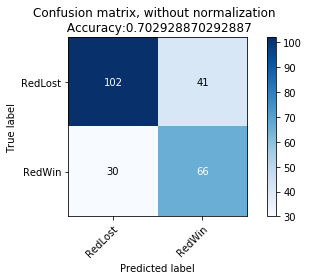

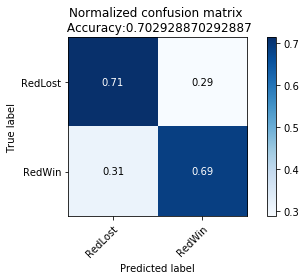

In [67]:
classes = np.array(['RedLost','RedWin'])

# Graficar matriz de confusión
plot_confusion_matrix(y_test, y_pred_tree, classes=classes,accuracy=accuracy_tree)

# Graficar matriz de confusión normalizada
plot_confusion_matrix(y_test, y_pred_tree, classes=classes, normalize=True,accuracy=accuracy_tree)

Probamos el tree classifier con variables estandarizadas

In [0]:

scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)   
X_test_std = scaler.transform(X_test)

In [0]:
clf_tree=DecisionTreeClassifier()
clf= GridSearchCV(clf_tree,parameters,cv= 5,verbose=3)
clf.fit(X_train_std, y_train)

In [40]:
clf.best_params_

{'max_depth': 11, 'min_samples_split': 50}

Entrenamiento

In [41]:
#treeClassifier2=DecisionTreeClassifier(max_depth= 5, min_samples_split= 70)
treeClassifier2=DecisionTreeClassifier(max_depth= 11, min_samples_split= 50)
treeClassifier2.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Prediccion

In [0]:
y_pred = treeClassifier2.predict(X_test_std)

In [43]:
print("Accuracy for Tree classifier data: ",accuracy_score(y_test,y_pred))

Accuracy for Tree classifier data:  0.702928870292887


Feature importances

In [44]:
importances = treeClassifier.feature_importances_ #array con valores de importancia
importances
indices = np.argsort(importances)[::-1] 
# np.argsort --> Returns the indices that would sort an array. Devuelve los índices del sort desc
indices
featname_importance = [(X_train.columns[col], importances[col])  for i, col in enumerate(indices[:10])]
featname_importance 

[('Redearnedgpmcmv', 0.30265143184296417),
 ('Blueearnedgpmcmv', 0.1450393410412942),
 ('Red_teamtowerkills_avgcumulative', 0.10170522779034784),
 ('BlueMid_kda', 0.07781321432040042),
 ('BlueSupport_kda', 0.0768249260613182),
 ('Blue_teamtowerkills_avgcumulative', 0.06745416519276314),
 ('Blue_cspm_avgcumulative', 0.04597987944972353),
 ('Blue_fd_avgcumulative', 0.03680597488975065),
 ('Blue_teamdragkills_avgcumulative', 0.025827889094719465),
 ('BlueTop_kda', 0.0254397703372728)]

**Algoritmo: Random Forest**

In [0]:
rfc=RandomForestClassifier(random_state=42)

In [0]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [0]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,verbose=3)
CV_rfc.fit(X_train_std, y_train)

**Algoritmo : Random Forest** | Mejor combinación de parámetros

In [88]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 500}

**Algoritmo : Random Forest** | Entrenamiento

In [46]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=7, criterion='gini')
rfc1.fit(X_train_std, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

**Algoritmo : Random Forest** | Predicción

In [0]:
y_pred_rfc=rfc1.predict(X_test_std)

**Algoritmo : Random Forest** | Precisión

In [48]:
accuracy_rfc = accuracy_score(y_test,y_pred_rfc)
print("Accuracy for Random Forest on CV data: ",accuracy_rfc)


Accuracy for Random Forest on CV data:  0.7615062761506276


**Algoritmo : Random Forest** | Matriz de confusión

Confusion matrix, without normalization
Normalized confusion matrix


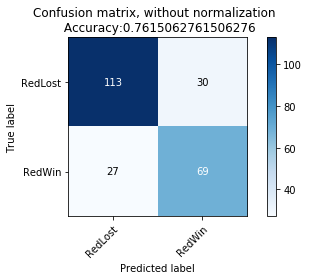

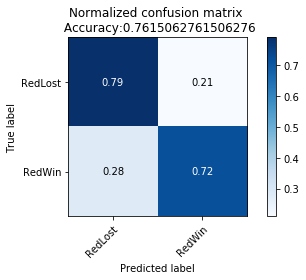

In [49]:
classes = np.array(['RedLost','RedWin'])

# Graficar matriz de confusión
plot_confusion_matrix(y_test, y_pred_rfc, classes=classes,accuracy=accuracy_rfc)

# Graficar matriz de confusión normalizada
plot_confusion_matrix(y_test, y_pred_rfc, classes=classes, normalize=True,accuracy=accuracy_rfc)

**Algoritmo : KNeighbors** 

In [0]:
grid_params = {
    "n_neighbors": [3,5,11,19],
    "weights": ["uniform","distance"],
    "metric": ["euclidean","manhattan"]
}

In [0]:
KN_gc = GridSearchCV(
 KNeighborsClassifier(),
    grid_params,
    verbose = 3,
    cv = 5,
    n_jobs = -1
)

In [0]:
gs_results = KN_gc.fit(X_train_std,y_train)

**Algoritmo : KNeighbors** | Mejor combinación de parámetros

In [53]:
gs_results.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

In [54]:
kn = KNeighborsClassifier(metric="manhattan",n_neighbors=19,weights="uniform")
kn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

**Algoritmo : KNeighbors** | Predicción

In [55]:
y_pred_kn=kn.predict(X_test_std)
y_pred_kn

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

**Algoritmo : KNeighbors** | Precisión

In [56]:
accuracy_kn = accuracy_score(y_test,y_pred_kn)
print("Accuracy for Kneighbors on CV data: ",accuracy_kn)

Accuracy for Kneighbors on CV data:  0.7196652719665272


**Algoritmo : KNeighbors** | Matriz de confusión

Confusion matrix, without normalization
Normalized confusion matrix


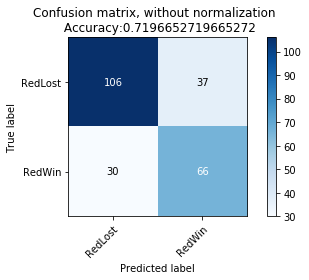

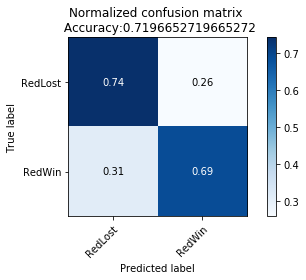

In [57]:
classes = np.array(['RedLost','RedWin'])

# Graficar matriz de confusión
plot_confusion_matrix(y_test, y_pred_kn, classes=classes,accuracy=accuracy_kn)

# Graficar matriz de confusión normalizada
plot_confusion_matrix(y_test, y_pred_kn, classes=classes, normalize=True,accuracy=accuracy_kn)

**Algoritmo : SVC** 

In [0]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True,cv=5, verbose=3)

In [0]:
grid.fit(X_train_std, y_train)

**Algoritmo : SVC** | Mejor combinación de parámetros

In [109]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

**Algoritmo : SVC** | Entrenamiento

In [60]:
svc_gridcv =  SVC(kernel='rbf', C=1000, gamma= 0.0001,probability=True)
svc_gridcv.fit(X_train_std, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

**Algoritmo : SVC** | Predicción

In [0]:
y_pred_svc=svc_gridcv.predict(X_test_std)

**Algoritmo : SVC** | Precisión

In [62]:
accuracy_svc = accuracy_score(y_test,y_pred_svc)
print("Accuracy for SVC on CV data: ",accuracy_svc)

Accuracy for SVC on CV data:  0.7489539748953975


**Algoritmo : SVC** | Matriz de confusión

Confusion matrix, without normalization
Normalized confusion matrix


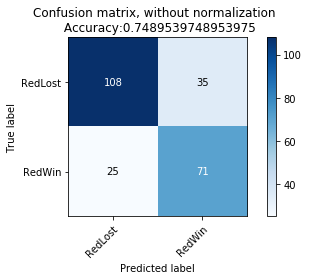

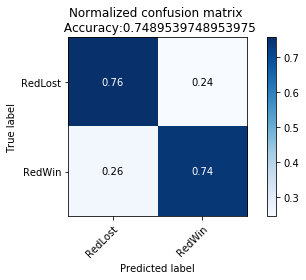

In [63]:
classes = np.array(['RedLost','RedWin'])

# Graficar matriz de confusión
plot_confusion_matrix(y_test, y_pred_svc, classes=classes,accuracy=accuracy_svc)

# Graficar matriz de confusión normalizada
plot_confusion_matrix(y_test, y_pred_svc, classes=classes, normalize=True,accuracy=accuracy_svc)

Hacemos una función para realizar una votación entre la clasificación de los algoritmos

Listamos por score y elegimos los 3 mejores para hacer un ensamble por votación



1.   RandomForest: 0.7615062761506276 - y_pred_rfc
2.   Svc : 0.7489539748953975 - y_pred_svc
3.   KNeighbors: 0.7196652719665272 - y_pred_kn
4.   TreeClassifier: 0.702928870292887 - y_pred_tree



In [68]:
def getVoteResult(v1,v2,v3):
  result = 1 if v1 + v2 + v3 > 1 else 0
  return result

#y_pred_rfc
#y_pred_svc
type(y_pred_kn)

rfc_y = pd.Series(y_pred_rfc, name='rfc')
svc_y = pd.Series(y_pred_svc, name='svc')
kn_y = pd.Series(y_pred_kn, name='kn')

dfooled = pd.concat([rfc_y, svc_y, kn_y], axis=1)

dfooled['result'] = dfooled.apply(lambda x: getVoteResult(x['rfc'],x['svc'],x['kn']), axis = 1)
ykd = dfooled['result'].values

y_test_copy = y_test 

y_test_copy = y_test_copy.reset_index()
ty = pd.concat([y_test_copy,dfooled['result']], axis=1)

print(ty.to_string())

     index  RedWin  result
0      369       1       0
1      247       1       1
2      260       1       1
3      155       0       0
4      566       0       0
5      549       0       0
6      219       0       1
7       58       0       0
8      169       0       0
9       60       1       0
10      29       0       0
11     162       0       0
12     132       1       1
13     572       0       0
14     380       0       0
15      70       1       0
16     523       0       0
17     239       0       1
18     447       1       1
19      86       0       0
20     496       1       0
21     398       0       0
22     277       0       1
23     332       0       0
24     210       0       0
25     140       0       0
26      91       0       0
27     197       0       1
28     376       1       1
29     422       0       0
30     229       0       0
31     282       0       0
32     318       0       0
33      59       0       0
34     240       1       1
35     423       0       0
3

**Ensamble** | Precisión

In [69]:
accuracy_ensamble = accuracy_score(y_test,ykd)
print("Accuracy for ensemble on CV data: ",accuracy_ensamble)

Accuracy for ensemble on CV data:  0.7531380753138075


**Ensamble votación** | Matriz de confusión

Confusion matrix, without normalization
Normalized confusion matrix


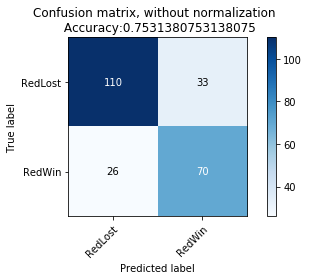

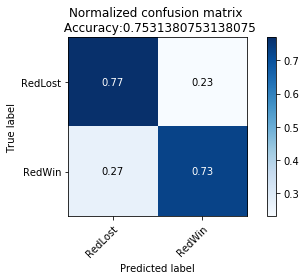

In [70]:
classes = np.array(['RedLost','RedWin'])

# Graficar matriz de confusión
plot_confusion_matrix(y_test, ykd, classes=classes,accuracy=accuracy_ensamble)

# Graficar matriz de confusión normalizada
plot_confusion_matrix(y_test, ykd, classes=classes, normalize=True,accuracy=accuracy_ensamble)

Graficos

In [0]:
# ¿ Cuál es la probabilidad de ganar aplicando una estrategia efectiva en el juego temprano ?


# Obtenemos un dataframe de aquellos partidos donde un equipo
# Realizo la primera muerte
# Realizo el primer objetivo de monstruo
# Destruyó la primera torre

agressiveResult = dfsummer.loc[((dfsummer.playerid == 100) | 
         (dfsummer.playerid == 200 )) & (
         (dfsummer.fb == 1) & 
         (dfsummer.fd == 1) & 
         (dfsummer.ft == 1) & 
         (dfsummer.result == 1)), ['gameid','league','fb','fd','ft','result',] ]

agressiveResultNeg = dfsummer.loc[((dfsummer.playerid == 100) | 
         (dfsummer.playerid == 200 )) & (
         (dfsummer.fb == 1) & 
         (dfsummer.fd == 1) & 
         (dfsummer.ft == 1) & 
         (dfsummer.result == 0)), ['gameid','league','fb','fd','ft','result',] ]


earlyAgressiveTeamsWon = len(agressiveResult)
earlyAgressiveTeamsLost = len(agressiveResultNeg)

labels = ['Equipos agresivos que ganaron','Equipos agresivos que perdieron']
values = [earlyAgressiveTeamsWon, earlyAgressiveTeamsLost]

# Lo configuramos como un gráfico de dona
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text='¿Cuál es la probabilidad de ganar aplicando una estrategia efectiva en el juego temprano?')
fig.show()

In [0]:
# ¿ Qué liga obtuvo el jugador con mayor kda al momento de llegar el último partido de cada equipo ?

# Seleccionamos el mayor kda relacionado a un jugador partidas de última semana de cada liga
cblol_league_player = dfPlayerMatches.loc[(dfPlayerMatches.league == 'CBLoL') & (dfPlayerMatches.week == 11),'kda' ].max()
lcs_league_player = dfPlayerMatches.loc[(dfPlayerMatches.league == 'LCS') & (dfPlayerMatches.week == 9.0),'kda' ].max()
lec_league_player = dfPlayerMatches.loc[(dfPlayerMatches.league == 'LEC') & (dfPlayerMatches.week == 9.0),'kda' ].max()
lms_league_player = dfPlayerMatches.loc[(dfPlayerMatches.league == 'LMS') & ((dfPlayerMatches.week == 7.1) | (dfPlayerMatches.week == 7.2) | (dfPlayerMatches.week == 7.3)),'kda' ].max()
lck_league_player = dfPlayerMatches.loc[(dfPlayerMatches.league == 'LCK') & ((dfPlayerMatches.week == 10.1) | (dfPlayerMatches.week == 10.2) | (dfPlayerMatches.week == 10.3) | (dfPlayerMatches.week == 10.4)),'kda' ].max()

dfKDAByLeague = pd.DataFrame({'League':['CBLOL', 'LCS', 'LEC', 'LMS','LCK'], 
                    'KDA':[cblol_league_player, lcs_league_player, lec_league_player, lms_league_player, lck_league_player]}) 

fig = px.bar(dfKDAByLeague, x="League", y="KDA", color="League")
fig.update_layout(title_text='¿Qué liga obtuvo el jugador con mayor kda al momento de llegar el último partido de cada equipo?')
fig.show()



Muertes a enemigos acumuladas por equipo a través de las semanas





In [0]:
dfMatches[['acum_teamkills']] = dfMatches.groupby(['team'])[['teamkills']].cumsum()
dfMatches.loc[dfMatches.team=='CNB',['teamkills','acum_teamkills']]

subsetDfMatches =  dfMatches.loc[dfMatches.league=='CBLoL',['week','team','teamkills','acum_teamkills']]

CNB = subsetDfMatches.query("team=='CNB'")
Flamengo = subsetDfMatches.query("team=='Flamengo'")
INTZ = subsetDfMatches.query("team=='INTZ'")


fig = go.Figure()


fig.add_trace(go.Scatter(x=CNB['week'], y=CNB['acum_teamkills'],
                    mode='lines',
                    name='CNB'))
fig.add_trace(go.Scatter(x=Flamengo['week'], y=Flamengo['acum_teamkills'],
                    mode='lines',
                    name='Flamengo'))
fig.add_trace(go.Scatter(x=INTZ['week'], y=INTZ['acum_teamkills'],
                    mode='lines',
                    name='INTZ'))

fig.update_layout(title_text='Muertes a enemigos acumuladas por equipo a través de las semanas')
fig.show()

Preparamos datos para el próximo gráfico

In [0]:
# 
dfMatchesLength = pd.DataFrame()
dfMatchesLength[['sum_kills','avg_length']] = dfMatches.groupby(by=['league'])[['gamelength','teamkills']].agg({'teamkills':'sum' , 'gamelength':'mean' })
dfMatchesLength

dfKillsperRole = pd.DataFrame()
dfKillsperRole[['kacum']] = dfPlayerMatches.groupby(by=['league','position'])[['k']].sum()
dfKillsperRole.reset_index(1,inplace=True)
dfKillsperRole = dfKillsperRole.pivot(columns='position',values='kacum')
merged = pd.merge(dfKillsperRole, dfMatchesLength, left_index=True, right_index=True)
merged.reset_index(inplace=True)
merged.sort_values(by=['avg_length','sum_kills'],inplace=True,ascending=[True, False])
merged['adc_kill_percentage'] = ( 100 * merged.ADC) /  merged.sum_kills
merged['jungle_kill_percentage'] = (100 * merged.Jungle) / merged.sum_kills
merged['middle_kill_percentage'] = (100 * merged.Middle) / merged.sum_kills
merged['support_kill_percentage'] = (100 * merged.Support) / merged.sum_kills
merged['top_kill_percentage'] = (100 * merged.Top) / merged.sum_kills
merged

#testdf = pd.DataFrame()
#testdf[['teamkilling','gamelrin']] = dfMatches.groupby(by=['league'])[['gamelength','teamkills']].agg({'teamkills':'sum' , 'gamelength':'mean' })
#groupByLeague = dfsummer.groupby('league')
#newDF = groupByLeague.gameid.nunique()

#merged = pd.merge(newDF, testdf, left_index=True, right_on='league')
#merged['killspergame'] = merged.teamkilling / merged.gameid
#merged



,league,ADC,Jungle,Middle,Support,Top,sum_kills,avg_length,adc_kill_percentage,jungle_kill_percentage,middle_kill_percentage,support_kill_percentage,top_kill_percentage
3,LEC,699,435,664,204,460,2462,32.244259,28.391552,17.668562,26.969943,8.285946,18.683997
0,CBLoL,545,439,529,170,482,2165,32.784524,25.173210,20.277136,24.434180,7.852194,22.263279
4,LMS,653,404,583,144,456,2240,33.533170,29.151786,18.035714,26.026786,6.428571,20.357143
1,LCK,1344,807,1111,241,1080,4583,33.631116,29.325769,17.608553,24.241763,5.258564,23.565350
2,LCS,552,334,538,141,455,2020,33.773333,27.326733,16.534653,26.633663,6.980198,22.524752


¿Cómo se reparten las muertes a enemigos por rol en cada liga?

In [0]:

# Como se reparten las muertes a enemigos por rol en cada liga

# Función para retornar un hoverText formateado y con más información
def returnRoundedPc(roleKillPercentage):
  ahoverText = []

  for index,value in roleKillPercentage.items():
    ahoverText.append("Kill Percentage : "+ str(math.floor(value))  +"%")

  return ahoverText

# Cada rol es un trazo

# Creamos la figura
fig = go.Figure(data=[
                      go.Bar(x=merged.league, 
                             y=merged.ADC,
                             hovertext=returnRoundedPc(merged.adc_kill_percentage),
                             marker_color='#FFBF00', 
                             name='Adc'), # ADC
                      go.Bar(x=merged.league, 
                             y=merged.Jungle,
                             hovertext=returnRoundedPc(merged.jungle_kill_percentage),
                             marker_color='#E83F6F', 
                             name='Jungle'), # JUNGLE
                      go.Bar(x=merged.league, 
                             y=merged.Middle,
                             hovertext=returnRoundedPc(merged.middle_kill_percentage),
                             marker_color='#2274A5', 
                             name='Middle'), # MIDDLE
                      go.Bar(x=merged.league, 
                             y=merged.Support,
                             hovertext=returnRoundedPc(merged.support_kill_percentage),
                             marker_color='#32936F', 
                             name='Support'), # SUPPORT
                      go.Bar(x=merged.league, 
                             y=merged.Top,
                             hovertext=returnRoundedPc(merged.top_kill_percentage),
                             marker_color='#1E152A', 
                             name='Top') # TOP
                      ])

# Customizamos el gráfico 
fig.update_traces(marker_line_width=1.5, opacity=0.6)
fig.update_layout(
    title_text='¿Cómo se reparten las muertes a enemigos por rol en cada liga?',
    yaxis=dict(
      title='Kills',
      titlefont_size=16,
      tickfont_size=14),
    xaxis=dict(
      title='Ligas',
      titlefont_size=16,
      tickfont_size=14),
    barmode='stack'
    )
fig.show()

#https://plot.ly/~athean/0/stack-bars-and-scatter/#code